# Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (9, 6)

In [4]:
# Save Figure Customization
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.3

In [5]:
# Axes Customization
plt.rcParams['axes.labelpad'] = 10

## Target Distribution

We will generate a target distribution using a sine curve - between 60 Degrees (pi/3) to 300 degrees (5pi/3) with a bias = 2 and random noise

In [6]:
# Set Random Seed
np.random.seed(314)
n_samples = 100

In [7]:
f = lambda x: np.sin(x) + 2

In [8]:
degree_start = 60
degree_end = 300

In [86]:
n_samples = (degree_end - degree_start)/4

In [87]:
n_samples

60.0

In [57]:
x = np.array([i*np.pi/180 for i in range(degree_start,degree_end,4)])

In [58]:
y = f(x) + np.random.normal(0,0.15,len(x))

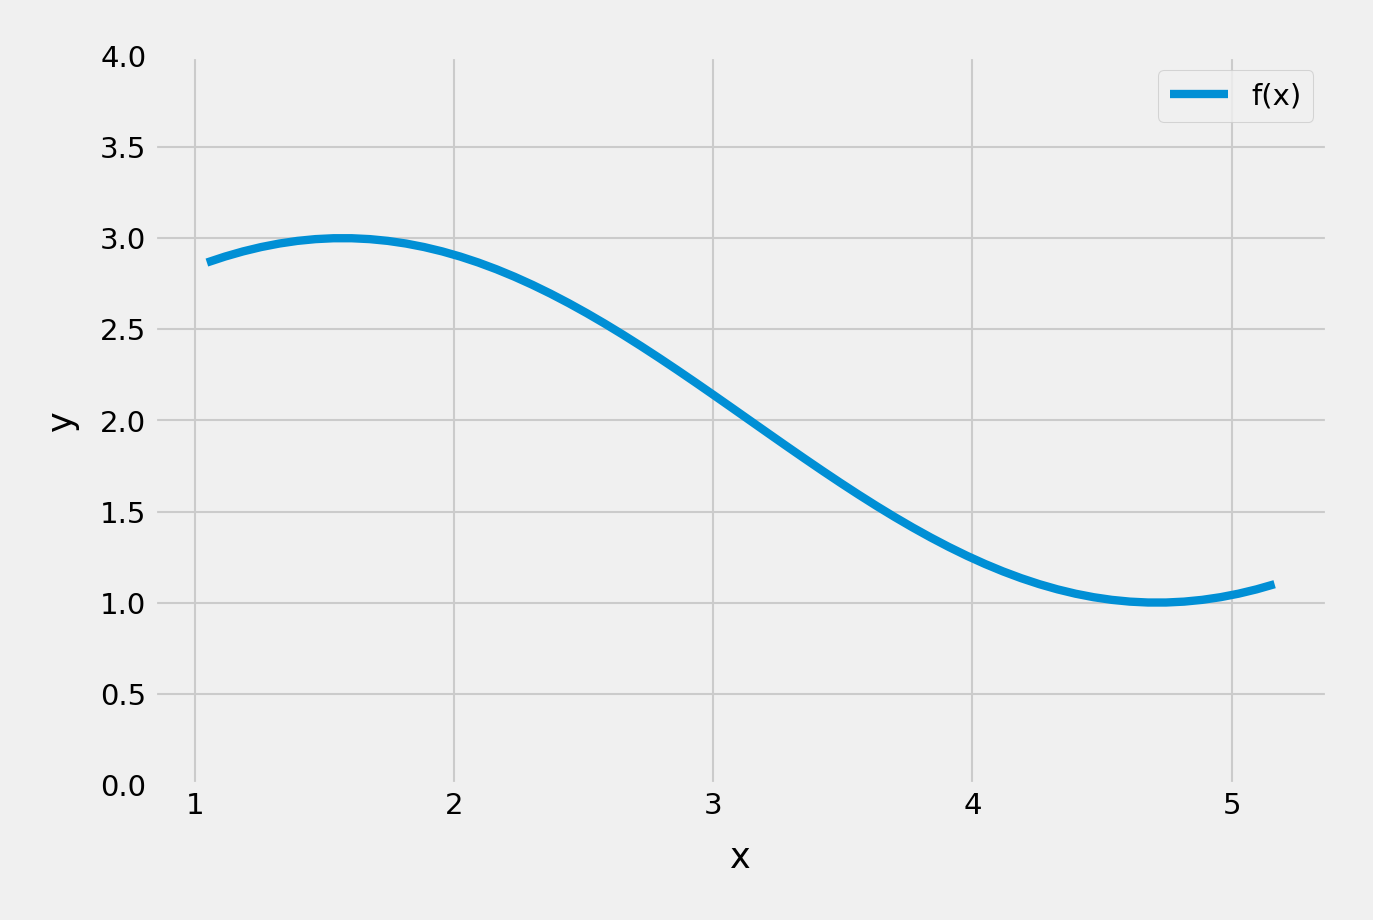

In [124]:
#fig = plt.gca()
plt.plot(x,f(x), c='C0',label="f(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,4])
plt.legend(loc="best")
#fig.xaxis.set_ticklabels([])
#fig.yaxis.set_ticklabels([])
plt.savefig('figures/regression-00.png')

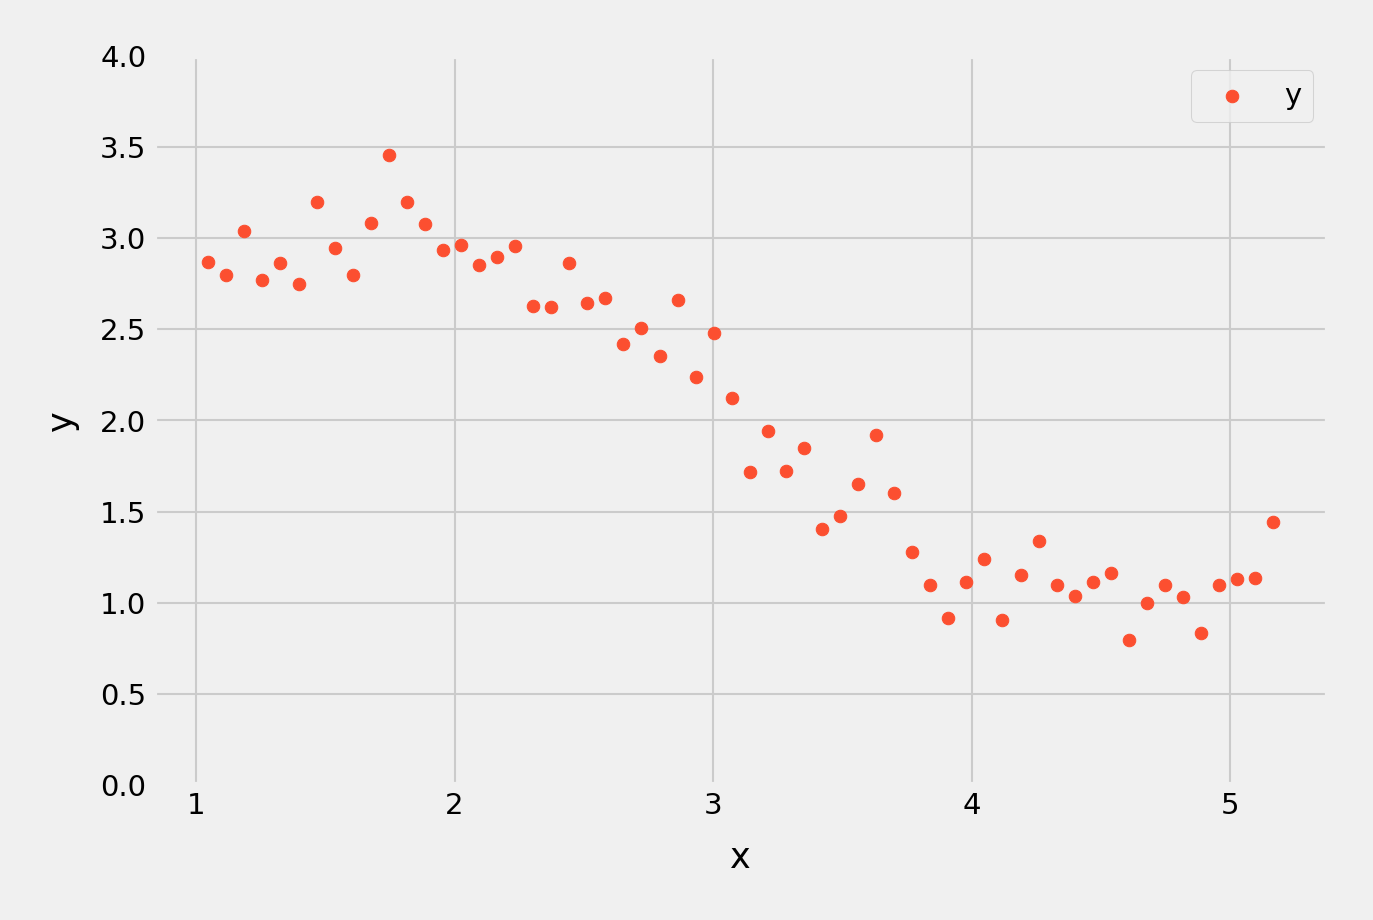

In [125]:
plt.scatter(x,y,c = 'C1', label="y")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,4])
plt.legend(loc="best")
plt.savefig('figures/regression-01.png')

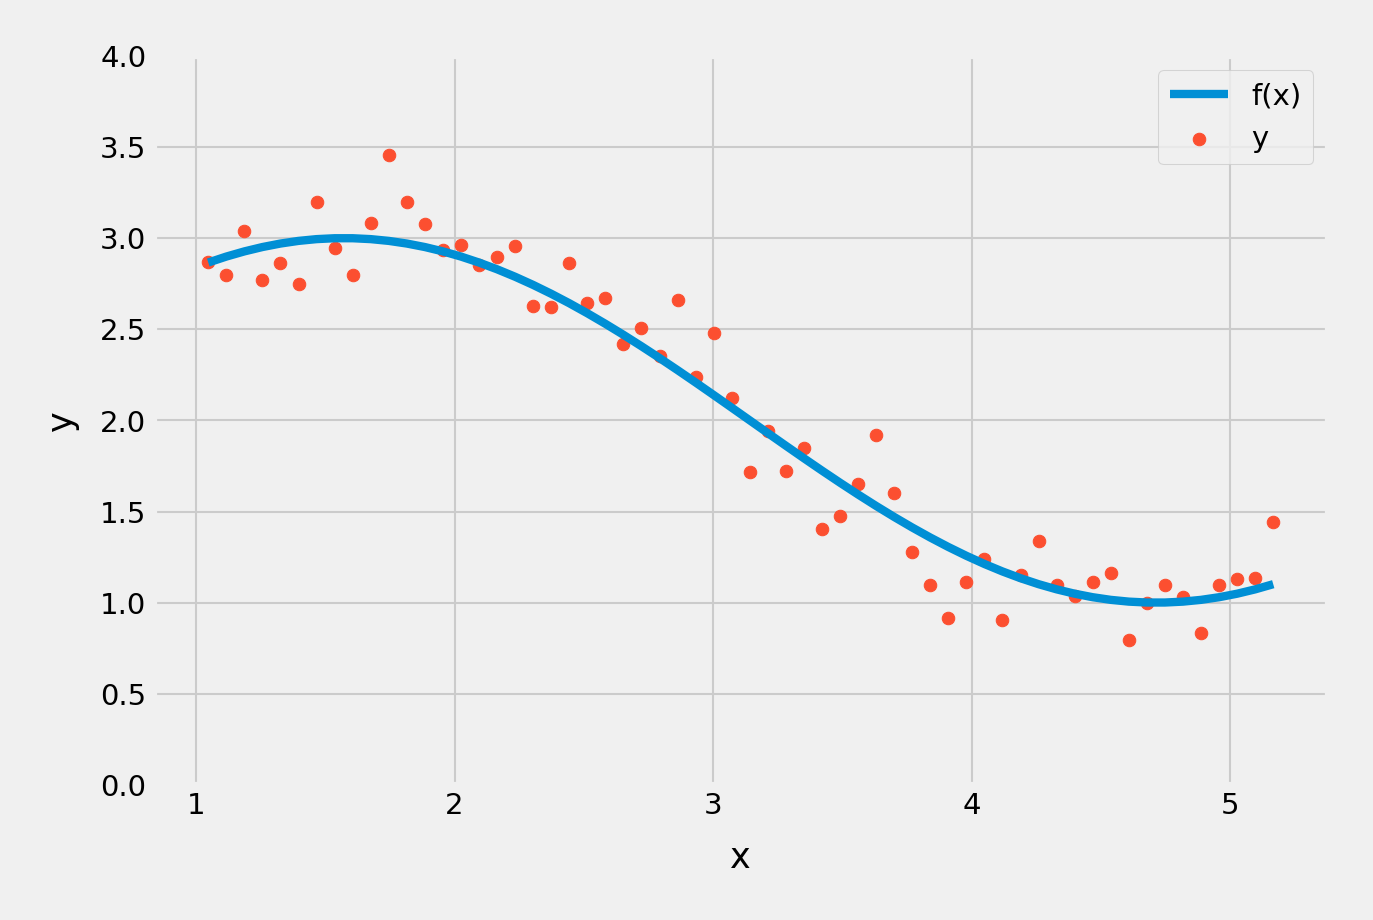

In [126]:
plt.scatter(x,y, c='C1', label="y")
plt.plot(x,f(x), c='C0',label="f(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0,4])
plt.legend(loc="best")
plt.savefig('figures/regression-02.png')

## Model Fitting

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [98]:
def ols(degree):
    #Fit the model
    linear_regression = LinearRegression(normalize=True)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    pipeline = Pipeline([("polynomial_features", poly_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)
    y_pred = pipeline.predict(x[:, np.newaxis])
    
    #Score the Model ans save coefficients
    mse = mean_squared_error(y_pred,y)
    
    #Save the Coefficient
    ret = [mse]
    ret.extend([linear_regression.intercept_])
    ret.extend(linear_regression.coef_)
    return y_pred, ret

In [208]:
ols_power = 10

In [209]:
#Initialize a dataframe to store the coeffs
col = ['mse','intercept'] + ['coef_x_%d'%i for i in range(1,ols_power)]
ind = ['ols_%d'%i for i in range(1,ols_power)]
coef_matrix_ols = pd.DataFrame(index=ind, columns=col)

In [210]:
#Initialize a dataframe to store the predictions
y_pred_ols = pd.DataFrame(columns = ['y_pred_ols_%d'%i for i in range(1,ols_power)])

In [211]:
#Store the coeff as well as predictions
for i in range(1,ols_power):
    y_pred_ols['y_pred_ols_' + str(i) ] = ols(i)[0]
    coef_matrix_ols.iloc[i-1,0:i+2] = ols(i)[1]

In [212]:
coef_matrix_ols.head()

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9
ols_1,0.0869505,3.98409,-0.628318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ols_2,0.0868091,3.90959,-0.571792,-0.00909748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ols_3,0.0288227,0.120477,4.00097,-1.62807,0.173709,NaN,NaN,NaN,NaN,NaN,NaN
ols_4,0.028769,0.414426,3.51599,-1.3562,0.111322,0.00502036,NaN,NaN,NaN,NaN,NaN
ols_5,0.0283967,2.40162,-0.635497,1.85066,-1.04351,0.200748,-0.0126004,NaN,NaN,NaN,NaN


In [213]:
y_pred_ols.head()

,y_pred_ols_1,y_pred_ols_2,y_pred_ols_3,y_pred_ols_4,y_pred_ols_5,y_pred_ols_6,y_pred_ols_7,y_pred_ols_8,y_pred_ols_9
0,3.326119,3.300830,2.724384,2.742994,2.792811,2.841322,2.811581,2.911601,2.917286
1,3.282254,3.259537,2.800335,2.812636,2.837122,2.851100,2.849587,2.827549,2.824562
2,3.238389,3.218155,2.866089,2.873061,2.878330,2.869683,2.883258,2.812817,2.807737
3,3.194524,3.176685,2.922002,2.924543,2.915853,2.893981,2.913346,2.839729,2.835903
4,3.150660,3.135126,2.968428,2.967360,2.949177,2.921311,2.940254,2.887876,2.886544


In [218]:
powers = [1,4,9]

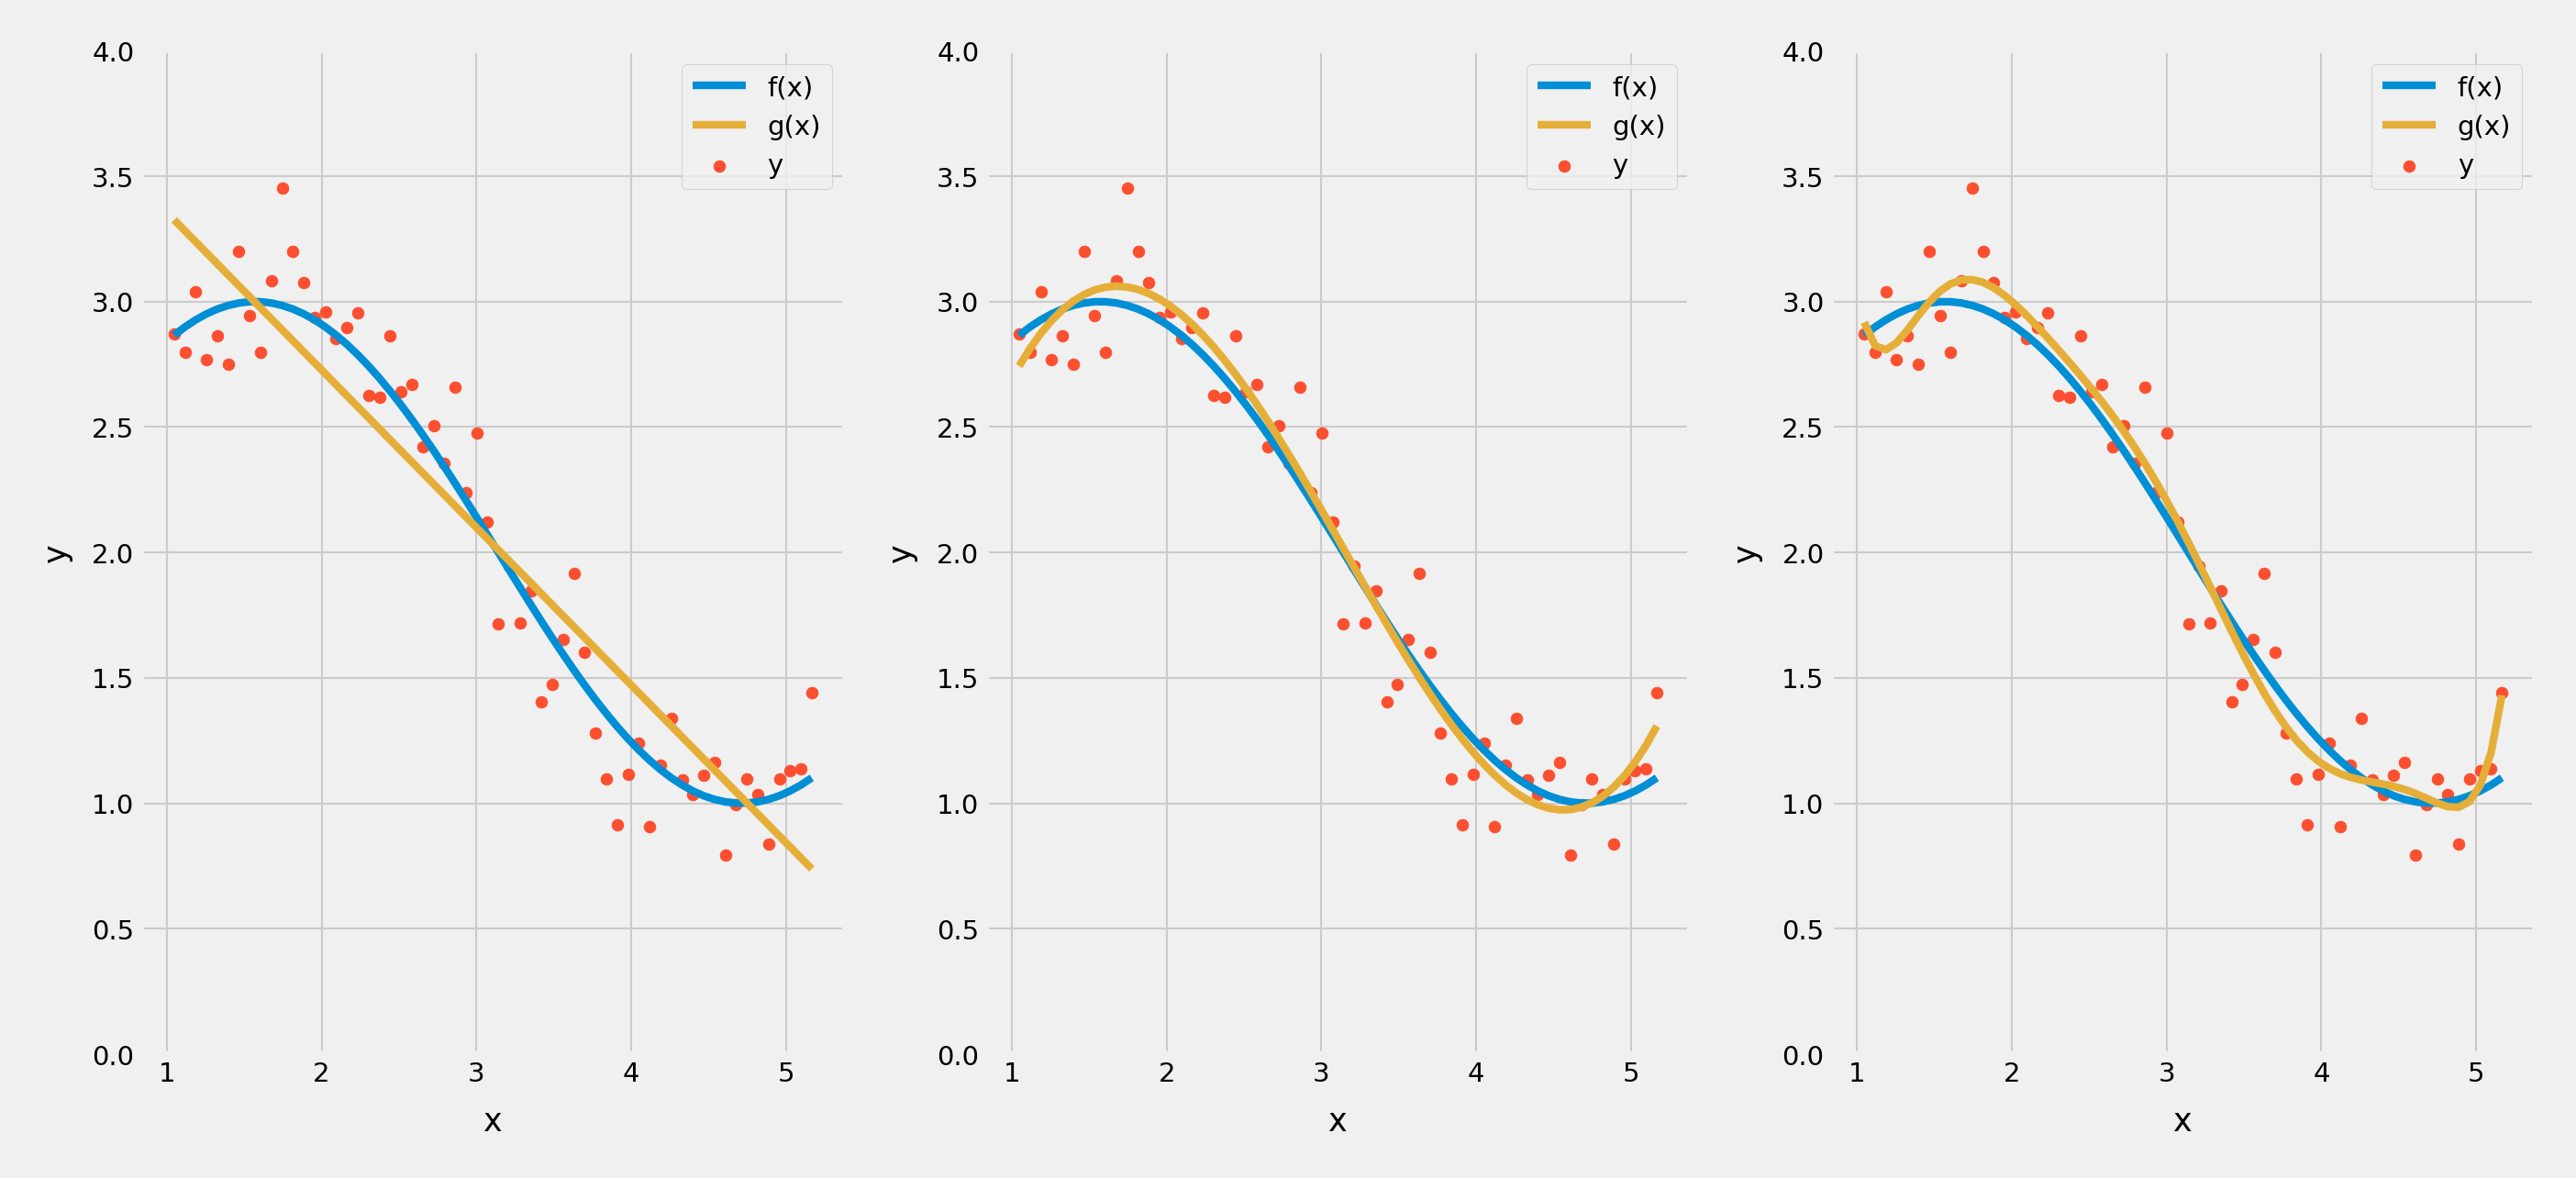

In [219]:
plt.figure(figsize=(20,9))
for i in range(len(powers)):
    y_pred = y_pred_ols['y_pred_ols_' + str(powers[i])]
    plt.subplot(1,3,i+1)
    #plt.tight_layout()
    plt.scatter(x, y, c='C1', label="y")
    plt.plot(x, f(x), c='C0', label="f(x)")
    plt.plot(x, y_pred, c="C2", label="g(x)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([0,4])
    plt.legend(loc="best")
    plt.savefig('figures/regression-03.png')

In [ ]:
coef_matrix_ols.mse.plot()
plt.ylim(0,.1)

In [ ]:
for i in range(1,ols_power):
    y_pred = y_pred_ols['y_pred_ols_' + str(powers[i])]
    plt.subplot(1,3,i+1)
    #plt.tight_layout()
    plt.scatter(x, y, c='C1', label="y")
    plt.plot(x, f(x), c='C0', label="f(x)")
    plt.plot(x, y_pred, c="C2", label="g(x)")
    plt.xlabel('power')
    plt.ylabel('mean squared error')
    plt.legend(loc="best")
    plt.savefig('figures/regression-04.png')